# Install Libraries

In [ ]:
!pip install PyMuPDF


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 44.9 MB/s eta 0:00:00


In [ ]:
!pip install nltk


In [ ]:
!nltk download punkt

Usage: nltk [OPTIONS] COMMAND [ARGS]...
Try 'nltk -h' for help.

Error: No such command 'download'.


In [ ]:
pip install PrettyTable


# Imports libraries such as Pandas, Matplotlib, Numpy, Scikit-learn, difflib (for text matching), fitz (from PyMuPDF for PDF reading), and NLTK (for natural language processing)

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn import linear_model
import difflib
import fitz
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from google.colab import files
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def read_pdf(file_path):
    doc = fitz.open(file_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text

#Calculate Match Percentage



In [ ]:
def calculate_match_percentage(master_text, other_text):
    matcher = difflib.SequenceMatcher(None, master_text, other_text)
    return round(matcher.ratio() * 100, 2)

#Extract Keywords



In [ ]:
def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    keywords = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return keywords


#Main Workflow:

* This is the main logic that orchestrates the file uploads, document comparison, and keyword extraction
* Reads and processes the master document and the other documents, calculates match percentages, and extracts keywords.
* Sorts the results based on match percentage.
* Displays the comparison results in a table

Saving Data1.pdf to Data1 (16).pdf


Saving Data2.pdf to Data2 (15).pdf
+----------------+------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

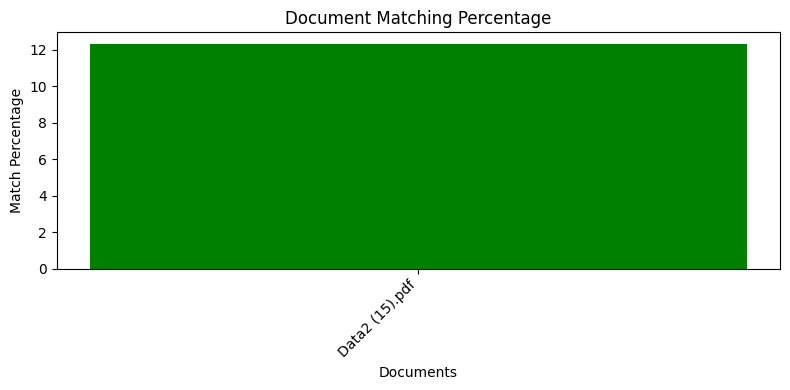

In [ ]:
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from google.colab import files  # Assuming you are using Google Colab

def main():
    # Upload the master document
    uploaded_master = files.upload()
    master_document_path = list(uploaded_master.keys())[0]

    # Upload the other documents
    uploaded_others = files.upload()
    other_documents_paths = list(uploaded_others.keys())

    # Now you can use the file paths in your script
    master_text = read_pdf(master_document_path)
    results = []
    all_keywords = []

    for doc_path in other_documents_paths:
        other_text = read_pdf(doc_path)
        match_percentage = calculate_match_percentage(master_text, other_text)
        keywords = extract_keywords(other_text)
        results.append({'document': doc_path, 'match_percentage': match_percentage, 'keywords': keywords})
        all_keywords.extend(keywords)

    results.sort(key=lambda x: x['match_percentage'], reverse=True)

    # Displaying results in a table
    table = PrettyTable()
    table.field_names = ["Document", "Match Percentage", "Keywords"]

    for result in results:
        table.add_row([result['document'], f"{result['match_percentage']}%", ', '.join(result['keywords'])])

    print(table)

    # Save highly repeated keywords to a separate file
    save_highly_repeated_keywords(all_keywords)

    # Plotting the graph
    documents = [result['document'] for result in results]
    match_percentages = [result['match_percentage'] for result in results]

    plt.figure(figsize=(8, 4))
    plt.bar(documents, match_percentages, color='green')
    plt.xlabel('Documents')
    plt.ylabel('Match Percentage')
    plt.title('Document Matching Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def save_highly_repeated_keywords(all_keywords):
    # Set a threshold for keyword repetition
    repetition_threshold = 2

    # Count the occurrences of each keyword
    keyword_counts = {keyword: all_keywords.count(keyword) for keyword in set(all_keywords)}

    # Filter keywords that are repeated more than the threshold
    highly_repeated_keywords = [keyword for keyword, count in keyword_counts.items() if count > repetition_threshold]

    # Save and print highly repeated keywords to a file
    with open("highly_repeated_keywords.txt", "w") as file:
        file.write("Highly Repeated Keywords:\n")
        file.write(", ".join(highly_repeated_keywords))

    # Print highly repeated keywords to the console
    print("Highly Repeated Keywords:", ", ".join(highly_repeated_keywords))



if __name__ == "__main__":
    main()
